# Population CTMC (PCTMC)

Consider a CTMC model of a
population in which
each of $N$ individuals can be in a state of state space $S$. Firing rate may depends on the
density of individuals in certain states.

Use the classes developed in the notebook `PCTMC_methods` to define an instance of a PCTMC model.
In order to correctly define a PCTMC model, one should define:
 - state variables,
 - rate parameters,
 - initial state $x_0$,
 - system size,
 - transitions: update vectors and propensity functions.

In [1]:
# Terminal: 
# pip install ipynb
# pip install sympy

from ipynb.fs.full.PCTMC_methods import *
from time import perf_counter as timer
import numpy as np

pctmc = Model()
#### Syntax to add variables:
pctmc.add_variable("A", initial_value)
#### Syntax to add parameters:
pctmc.add_parameter("k", param_value)
#### Set the dimension of the population:
pctmc.set_system_size("N",population_size)
#### Syntax to add transitions: 
pctmc.add_transition({"A": -1, "B": +1}, "rate*A") --> use symbolic expressions for propensity functions

Remember to **finalize** the initialization: pctmc.finalize_initialization()

Below you can see an example for the SIR epidemic model.

In [2]:
def epidemic_model(population_size):
    sir = Model()
    # variables are generated in the following order
    sir.add_variable("S", 0.99*population_size)
    sir.add_variable("I", 0.01*population_size)
    sir.add_variable("R", 0.0*population_size)
    # Adding parameters
    sir.add_parameter("ki", 2)
    sir.add_parameter("kr", 1)
    sir.add_parameter("ke", 1)
    sir.add_parameter("ks", 3)
    #setting the system size N
    sir.set_system_size("N",population_size)
    # Adding transitions, using a dictionary to represent the update vector
    sir.add_transition({"S":-1, "I":1},  "ke*S + ki/N*I*S")
    sir.add_transition({"I":-1, "R":1},  "kr*I")
    sir.add_transition({"R":-1, "S":1},  "ks*R")
    #finalize initialization
    sir.finalize_initialization()
    return sir

### Predator-Prey model
Lotka-Volterra model. Species are two: Predators and Preys.

Possible events are: preys reproduce, predators eat preys and reproduce, predators die off.

In [3]:
def lotka_volterra(preys = 150, predators = 75):
    lv = Model()
    # Adding variables
    lv.add_variable("PY", preys)     # PreYs
    lv.add_variable("PD", predators) # PreDators
    # Adding parameters
    lv.add_parameter("kpy", 1.2)    # Birth rate of a single prey
    lv.add_parameter("ke", 0.004) # Eat + Reproduce rate of a single predator
    lv.add_parameter("kd", 0.7)   # Death rate of a single predator
    # setting the system size N
    lv.set_system_size("N", preys + predators)
    # Adding transitions, using a dictionary to represent the update vector
    lv.add_transition({"PY":1},  "kpy*PY")            # A prey is born
    lv.add_transition({"PY":-1, "PD":1},  "ke*PY*PD") # A predator Eats + reproduces
    lv.add_transition({"PD":-1},  "kd*PD")            # A predator dies
    # remember to finalize
    lv.finalize_initialization()
    
    return lv

### Genetic Toggle Switch
Model the following system as a PCTMC. There are two genes $G_1$ and $G_2$, that can be in two states: either on or off. When gene $G_i$ is on, it produces a protein $P_i$ that can inhibit the expression of the other gene.

Species are $\{G_1^{on},G_2^{on},G_1^{off},G_2^{off}, P_1, P_2\}$, such that $G_i^{on}+G_i^{off}$ is constant.
The inhibition event is modeled as the binding of protein $P_1$ ($P_2$) with gene $G_2^{off}$ ($G_1^{off}$ ).
The proteins also unbind and degradate according to a given rate.

In [4]:
def genetic_toggle_switch(g1 = 100, g2 = 100):
    gts = Model()
    # Adding variables
    gts.add_variable("G1_ON", g1)
    gts.add_variable("G1_OFF", 0)
    gts.add_variable("G2_ON", g2)
    gts.add_variable("G2_OFF", 0)
    gts.add_variable("P1", 0)
    gts.add_variable("P2", 0)
    # Adding parameters
    gts.add_parameter("kg1", 0.03)   # Rate of production of P1 by G1on
    gts.add_parameter("kg2", 0.05)   # Rate of production of P2 by G2on
    gts.add_parameter("kb1", 0.01)   # Rate of binding of P1 to G2on
    gts.add_parameter("kb2", 0.02)   # Rate of binding of P2 to G1on
    gts.add_parameter("kub1", .005) # Rate of unbinding + degradation of P1 from G2off
    gts.add_parameter("kub2", .001) # Rate of unbinding + degradation of P2 from G1off
    # setting the system size N
    gts.set_system_size("N", g1 + g2)
    # Adding transitions, using a dictionary to represent the update vector
    gts.add_transition({"P1":1},  "kg1*G1_ON")                                # Production of a P1
    gts.add_transition({"P2":1},  "kg2*G2_ON")                                # Production of a P2
    gts.add_transition({"P1":-1, "G2_ON":-1, "G2_OFF":1},  "kb1 * P1 * G2_ON")# A P1 binds to a G2on
    gts.add_transition({"P2":-1, "G1_ON":-1, "G1_OFF":1},  "kb2 * P2 * G1_ON")# A P2 binds to a G1on
    gts.add_transition({"G1_OFF":-1, "G1_ON":1},  "kub2*G1_OFF")              # A P2 unbinds + degradates from a G1off
    gts.add_transition({"G2_OFF":-1, "G2_ON":1},  "kub1*G2_OFF")              # A P1 unbinds + degradates from a G2off    
    # remember to finalize
    gts.finalize_initialization()
    
    return gts


## Stochastic Simulation - SSA algorithm

Look into the class Simulator() and complete function `_SSA_single_simulation` with the ingredients needed to perform SSA simulation of stochastic trajectories.

Plot the stochastic trajectories.


20 % done
40 % done
60 % done
80 % done
100 % done


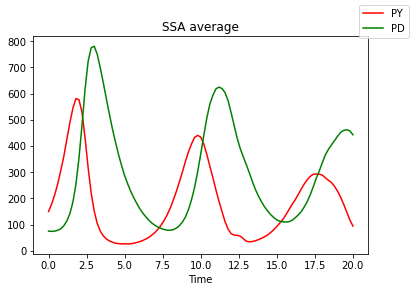

In [5]:
lv = lotka_volterra()
sim = Simulator(lv)
tr = sim.SSA_simulation(final_time = 20, runs = 50, points = 100, update = 20)
tr.plot()

20 % done
40 % done
60 % done
80 % done
100 % done


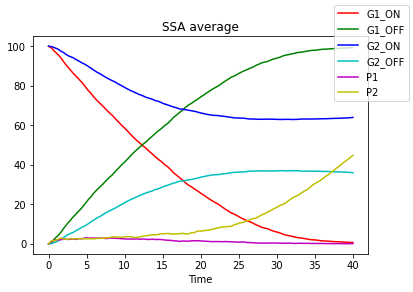

In [6]:
gts = genetic_toggle_switch()
sim = Simulator(gts)
tr = sim.SSA_simulation(final_time = 40, runs = 50, points = 100, update = 20)
tr.plot()

## Stochastic Approximation

Consider the PCTMC models defined above and implement the **Mean Field** (MF) and the **Linear Noise approximation** (LNA) of the stochastic evolution of the system.

Add the methods *MF_simulation()* and *LN_simulation* in the Simulator class. The overall structure of the solution is already in place, fill the gaps. Some methods in class Model() have to be completed as well. 

Symbolic representation is a key ingredient for the solution, so look at the Simpy documentation if needed.

Plot the deterministic trajectories of the MF approximation and the confidence interval given by the LNS.

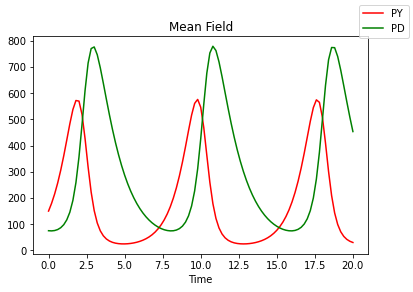

In [7]:
lv = lotka_volterra()
sim = Simulator(lv)
tr = sim.MF_simulation(final_time = 20, points = 100)
tr.plot()

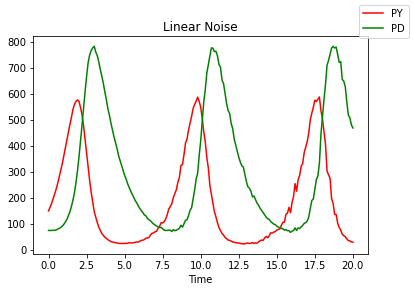

In [8]:
lv = lotka_volterra()
sim = Simulator(lv)
tr = sim.LN_simulation(final_time = 20, points = 200)
tr.plot()

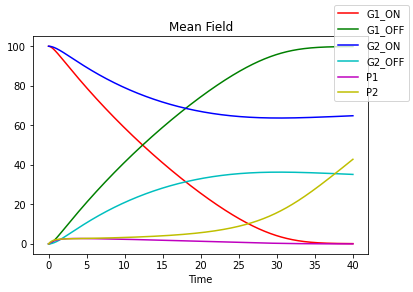

In [9]:
gts = genetic_toggle_switch()
sim = Simulator(gts)
tr = sim.MF_simulation(final_time = 40, points = 1000)
tr.plot()

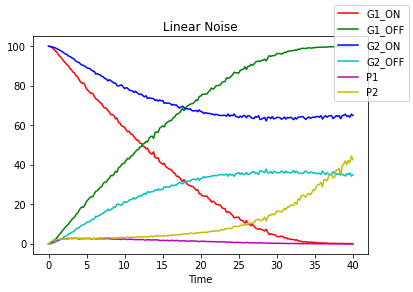

In [10]:
gts = genetic_toggle_switch()
sim = Simulator(gts)
tr = sim.LN_simulation(final_time = 40, points = 200)
tr.plot()